# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load dataset

In [2]:
def read_data(path):
    df = pd.read_csv(path)
    n_rows = df.shape[0]
    n_cols = df.shape[1]
    print('The dataset has "{}" samples and "{}" variables including the label parameter'.format(n_rows, n_cols))
    return df

data_path = 'creditcard.csv'
data = read_data(data_path)

The dataset has "284807" samples and "31" variables including the label parameter


#### The dataset contains information (30 variables) from around 300 K customers.

# Data exploration

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### The above table shows that the features were transformed and scaled (except the "Time",  "Amount", and "Class" variables) to prevent disclosure of confidential information from customers. Moreover all variables are numeric.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### The data looks clean without having any missing value or wrong data-type.

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


#### The statistical summary of the variables show that all the scaled features have mean value of close to zero and their standard deviations is between 0 and 2.

# Visualizing variable distributions

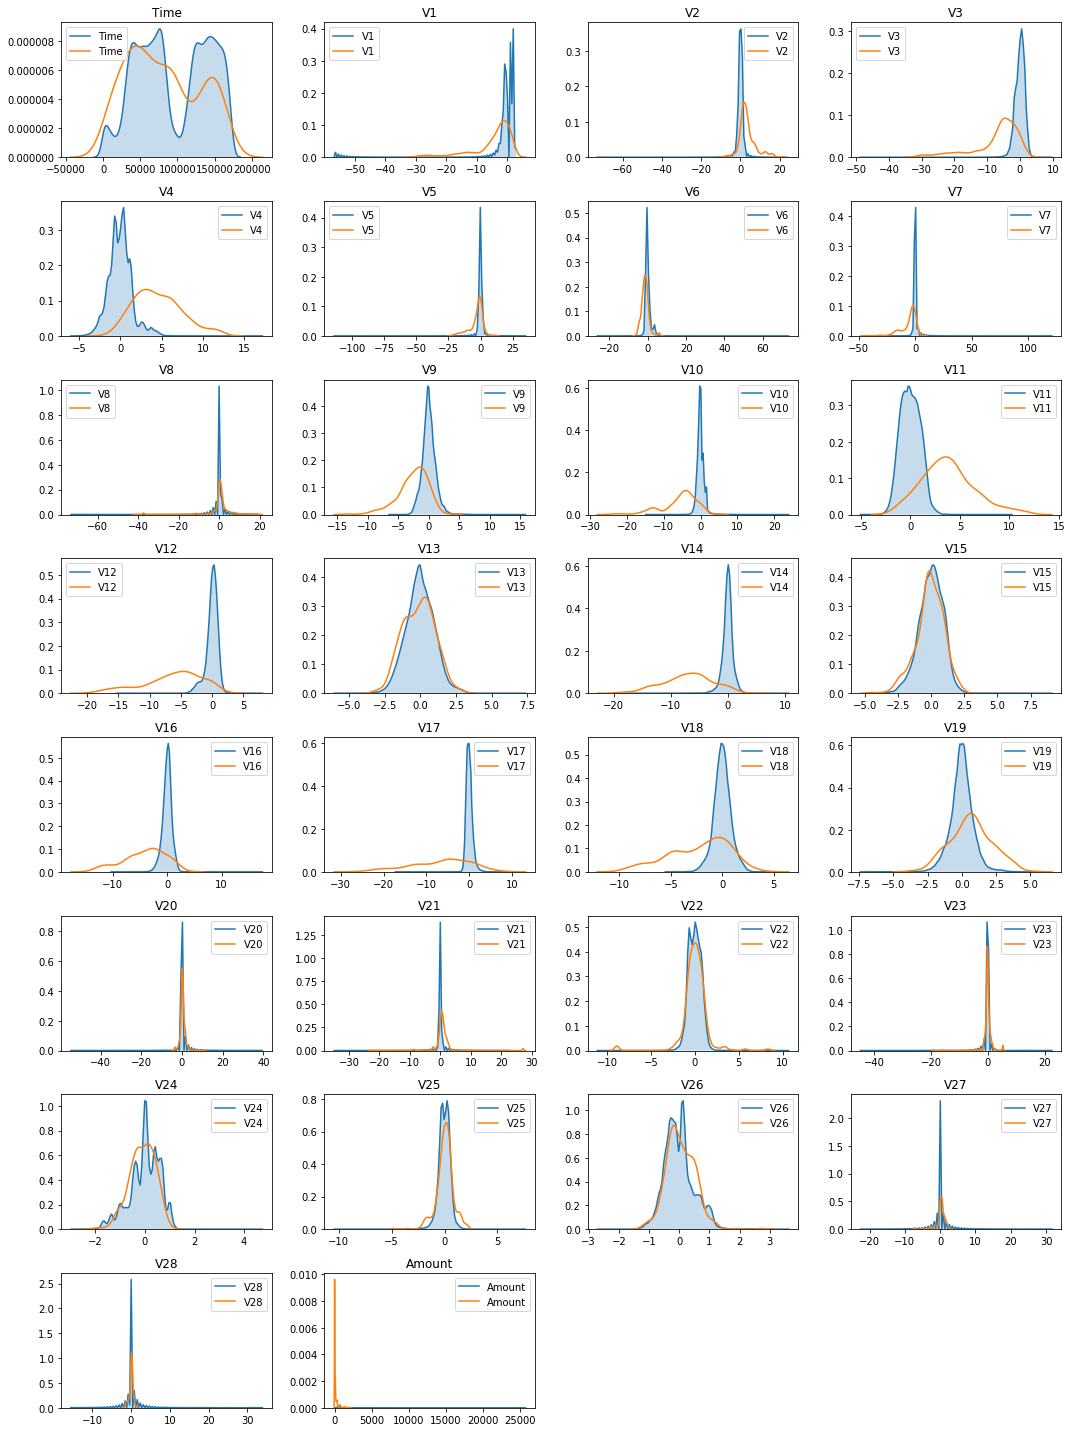

In [6]:
cols = list(data.drop(columns=['Class']).columns)
plt.figure(figsize=(15, 20))
i = 0
for col in cols:
    plt.subplot(8, 4, i+1)
    sns.kdeplot(data[data.Class==0][col], shade=True)
    sns.kdeplot(data[data.Class==1][col])
    plt.title(col)
    i += 1
plt.tight_layout()
plt.show()

#### The distribution plots show that most of the variables are highly skewed while some of them have bimodal distribution (e.x., "Time" and "V1").

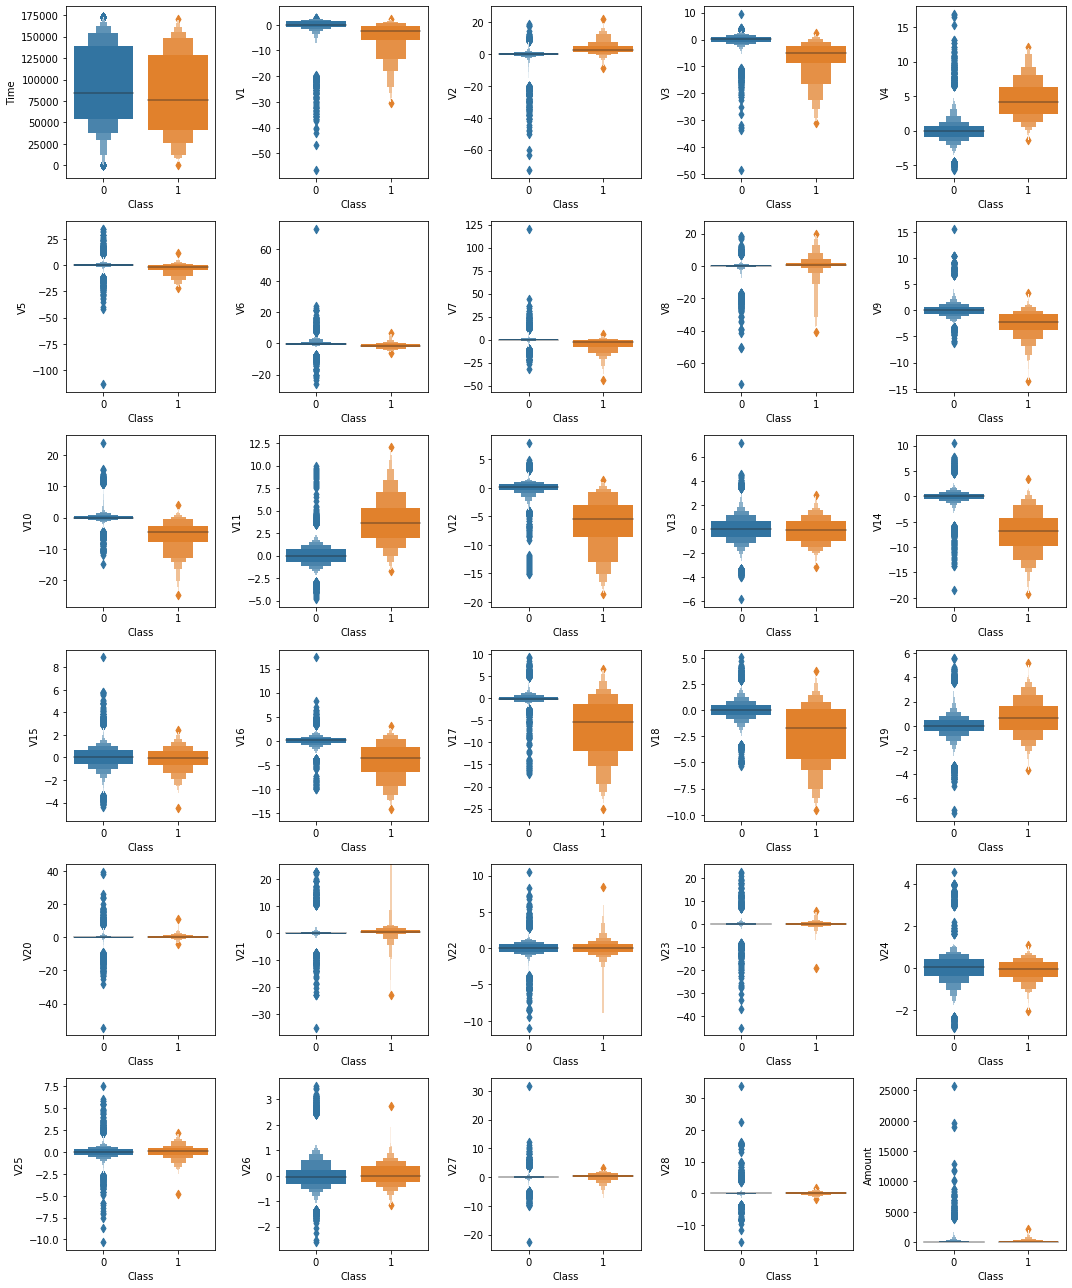

In [7]:
# ploting distribution of variables separated by "Class"
cols = list(data.drop(columns=['Class']).columns)

i = 1
plt.figure(figsize=(15, 18))
for col in cols:
    plt.subplot(6, 5, i)
    sns.boxenplot('Class', col, data=data)
    i += 1
plt.tight_layout()
plt.show()

In [8]:
# calculating mean and std values of variables separated by Class
mean_values = data.groupby('Class').mean().T
std_values = data.groupby('Class').std().T

# calculating Pearson's correlation coefficient among variables
corr = data.corr()

df = pd.concat([abs(corr.Class), mean_values, std_values], axis=1)
df.columns = ['corr_with_Class', 'mean_Class_0', 'mean_Class_1', 'std_Class_0', 'std_Class_1']
df['mean_difference'] = abs(df['mean_Class_0'] - df['mean_Class_1'])

df.drop('Class', axis=0).sort_values('corr_with_Class')

,corr_with_Class,mean_Class_0,mean_Class_1,std_Class_0,std_Class_1,mean_difference
V22,0.000805,-0.000024,0.014049,0.723668,1.494602,0.014073
V23,0.002685,0.000070,-0.040308,0.621541,1.579642,0.040378
V25,0.003308,-0.000072,0.041449,0.520673,0.797205,0.041521
V15,0.004223,0.000161,-0.092929,0.915060,1.049915,0.093090
V26,0.004455,-0.000089,0.051648,0.482241,0.471679,0.051738
V13,0.004570,0.000189,-0.109334,0.995067,1.104518,0.109523
Amount,0.005632,88.291022,122.211321,250.105092,256.683288,33.920299
V24,0.007221,0.000182,-0.105130,0.605776,0.515577,0.105312
V28,0.009536,-0.000131,0.075667,0.329570,0.547291,0.075798
Time,0.012323,94838.202258,80746.806911,47484.015786,47835.365138,14091.395347


#### Considering the distribution of independent variables, their correlation coefficient values with respect to the target variable (i.e., "Class"), and the difference between their mean values for two classes, we can realize that some of the features (i.e., V22, V23, V25, V15) may not add much information to the predictive model and could be removed. We will check the model performance with and without using these variables.

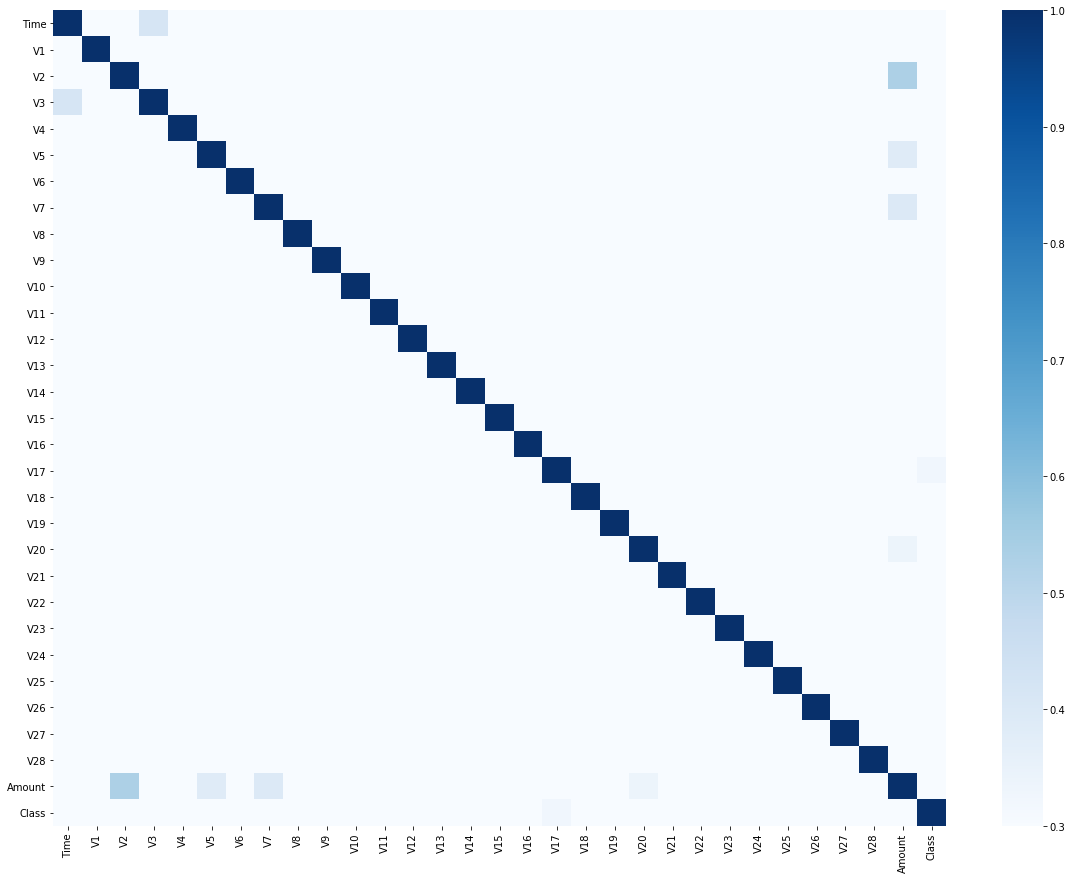

In [9]:
plt.figure(figsize=(20, 15))
sns.heatmap(abs(corr), xticklabels=corr.columns, yticklabels=corr.columns, vmin=0.3, cmap="Blues")

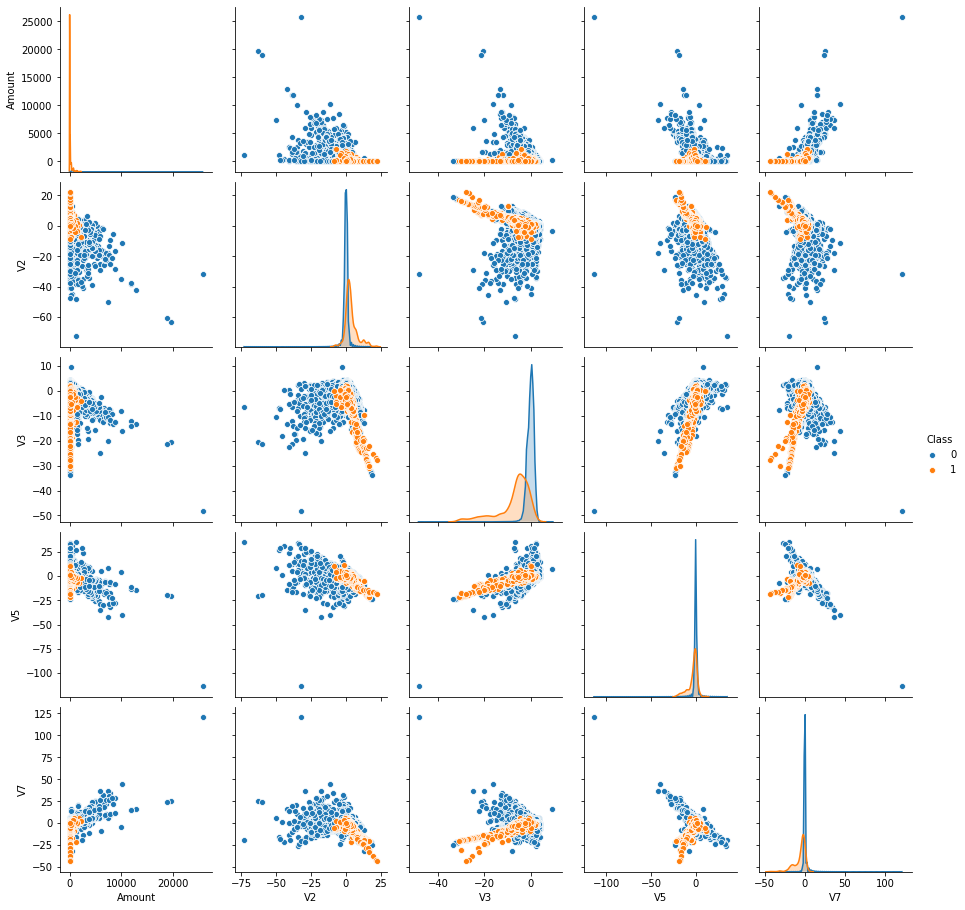

In [10]:
# ploting distribution of some variables which seem to be correlated with each other
correlated_cols = ['Amount', 'V2', 'V3', 'V5', 'V7', 'Class']
sns.pairplot(data[correlated_cols], hue='Class')

#### The scatterplots of the selected variables (which had highest correlation coefficients) show interesting patterns which can disclose valueable information. For example the "Amount" value of the fraudulent transactions are usually low (i.e., less than 3 K). Moreover, for fraudulent transactions the linear correlation among variables are much stronger and sometimes in opposite direction compared with the legal ones.

#### Looking through the variable distributions from different plots and by considering the correlation coefficient values, we can create two set of features (i.e., most effective and least effective variables) and use them in the modeling section

In [13]:
most_effective_vars = ['V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

least_effective_vars = ['V22', 'V23', 'V25', 'V15', 'V26', 'V13', 'Amount', 'V24', 'V28',
                        'Time', 'V27', 'V8', 'V20', 'V19', 'V21', 'V6']

# Calculating the class-ratio

In [12]:
class_counts = data.Class.value_counts()
print("Fraud rate is {}% of Total Transactions.".format(round(class_counts[1]/len(data)*100, 2)))

Fraud rate is 0.17% of Total Transactions.


#### The dataset is highly imbalanced in terms of "Class" ratio. This problem should be considered during ML modeling and model evaluation.

# Save outputs

In [14]:
import joblib

# Saving the data columns for modeling
joblib.dump(most_effective_vars, 'good_features.pkl')
joblib.dump(least_effective_vars, 'bad_features.pkl')

print("Model's columns dumped!")

Model's columns dumped!
